In [1]:
import statsmodels.api as sm
import pandas as pd
from scipy.stats import pearsonr

In [2]:
df = pd.read_excel('8.13 Tableau Exercise avg time online.xlsx')
# Display the first few rows of the DataFrame
print(df.head())

       County Region    State  Screen time hours  Poor mood percent of time
0      Shelby  South  Alabama                8.0                      0.176
1         Lee  South  Alabama                8.0                      0.176
2      Elmore  South  Alabama                8.0                      0.176
3  Tuscaloosa  South  Alabama                8.0                      0.176
4     Madison  South  Alabama                8.0                      0.176


In [3]:
# Confirm missing values are gone
df.isna().sum()

County                       0
Region                       0
State                        0
Screen time hours            2
Poor mood percent of time    2
dtype: int64

In [4]:
# Create two new, clean columns for the data we are going to analyze
df['screen_hrs'] = df['Screen time hours'].astype(float)
df['poor_moodpct'] = df['Poor mood percent of time'].astype(float)
df['screen_hrs'] = df['screen_hrs'].fillna(0)
df['poor_moodpct'] = df['poor_moodpct'].fillna(0.0)

In [5]:
display(df)

,County,Region,State,Screen time hours,Poor mood percent of time,screen_hrs,poor_moodpct
0,Shelby,South,Alabama,8.0,0.176,8.0,0.176
1,Lee,South,Alabama,8.0,0.176,8.0,0.176
2,Elmore,South,Alabama,8.0,0.176,8.0,0.176
3,Tuscaloosa,South,Alabama,8.0,0.176,8.0,0.176
4,Madison,South,Alabama,8.0,0.176,8.0,0.176
...,...,...,...,...,...,...,...
3136,Fremont,West,Wyoming,7.0,0.152,7.0,0.152
3137,Goshen,West,Wyoming,7.0,0.152,7.0,0.152
3138,Platte,West,Wyoming,7.0,0.152,7.0,0.152
3139,Washakie,West,Wyoming,7.0,0.152,7.0,0.152


<b>Question 1</b><p>
Compute and provide the Pearson correlation coefficient for the relationship between screen time (in hours) and poor mood (percent of time in a poor mood). [Optional but useful for feedback: include your analysis output in the document.]

In [6]:
# Answer Using scipy.stats
correlation, p_value = pearsonr(df['screen_hrs'], df['poor_moodpct'])

print(f'Answer to question 1: Pearson correlation coefficient: {correlation:.2f}')

Answer to question 1: Pearson correlation coefficient: 0.87


<b>Question 2</b><p>
Suppose there is a hypothesis that screen time leads to poor mood. Conduct a regression analysis to determine whether screen time predicts poor mood. Provide the following values from your analysis: p-value, R-squared value, and the coefficient for screen time. [Optional but useful for feedback: include your analysis output in the document.]

In [7]:
X = sm.add_constant(df['screen_hrs'])

# Define the response variable (runs)
y = df['poor_moodpct']

# Fit the linear regression model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           poor_moodpct   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     9586.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:42:31   Log-Likelihood:                 6854.5
No. Observations:                3141   AIC:                        -1.370e+04
Df Residuals:                    3139   BIC:                        -1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.001     -0.984      0.325      -0.004       0.001
screen_hrs     0.0223      0.000     97.909      0.000       0.022       0.023
==============================================================================
Omnibus:                     1735.886   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22264.994
Skew:                           2.354   Prob(JB):                         0.00
Kurtosis:                      15.163   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Answer to question 2
# p-value for the independent variable
p_value = model.pvalues['const'] 
r_squared = model.rsquared
coefficient = model.params['const']

print(f'P-value: {p_value:.4f}')
print(f'R-squared value: {r_squared:.4f}')
print(f'Coefficient: {coefficient:.4f}')

P-value: 0.3252
R-squared value: 0.7533
Coefficient: -0.0014


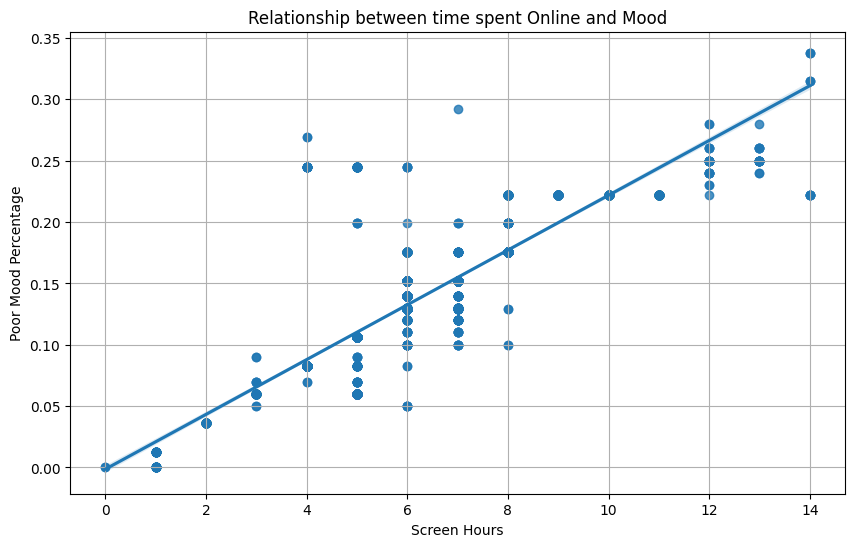

In [9]:
# Create a scatter plot with a regression line
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x='screen_hrs', y='poor_moodpct', data=df.drop(columns=['County', 'Region', 'State', 'Screen time hours', 'Poor mood percent of time']))
plt.xlabel("Screen Hours")
plt.ylabel("Poor Mood Percentage")
plt.title("Relationship between time spent Online and Mood")
plt.grid(True)
plt.show()

<b>Question 3</b><p>
Interpret the results of your analysis. Provide a written explanation of whether or not you believe screen time is a good predictor of poor mood based on the values from the analysis. Be sure to use the your values from question #2 to explain your interpretation.<p>
<p>
<b>Answer</b><p>
<b>P-value: 0.3252</b>: The p-value indicates the probability that the observed correlation occurred by chance. Using a threshold for statistical significance of 0.05 and the p-value is 0.3252, which is much higher than 0.05, we fail to reject the null hypothesis. This suggests that the relationship between screen time and poor mood is not statistically significant.<p>
<b>R-squared value: 0.7533</b>: The R-squared value represents the proportion of the variance in poor mood that is predictable from screen time. An R-squared value of 0.7533 indicates that approximately 75.33% of the variance in poor mood can be explained by screen time. This suggests a strong relationship between the two variables.<p>
<b>Coefficient: -0.0014</b>: The coefficient indicates the change in the dependent variable (poor mood) for a one-unit change in the independent variable (screen time). A coefficient of -0.0014 suggests a very small negative relationship between screen time and poor mood, meaning that as screen time increases, poor mood slightly decreases.<p>  
<b>Conclusion</b>: Despite the high R-squared indicating a strong relationship, the high p-value suggests that this relationship is not statistically significant. Therefore, based on this analysis, screen time does not appear to be a good predictor of poor mood.

<b>Question 4</b><p>
Provide your own personal opinion about the practical and/or social significance of this predictive model (e.g., do you believe this model has business value or practical usefulness? do you believe there are social implications to creating predictive models with data such as this? are there other factors or considerations we should be considering that aren't addressed in this model?<p>
<p>
<b>Answer</b><p>
Poor mood absolutely increases with screen time, so there is obviously some correlation between these two variables. One variable that is not included is the amount of sleep, which we could find to actually be the cause of the poor mood. Obviously there are host of other variables that could be explored, like age, gender, education level, etc.<p>
With the additional variables, there could be practical applications to this model in helping software, web and game developers improve their products.<p>
The social implications are: models that reliably predict a decline in mood based on screen time could be valuable for developing interventions. Apps or digital platforms could provide users with real-time feedback, suggesting breaks, alternative activities, or mindfulness exercises, which is likely something that both Apple and Microsoft have done with their latest operating systems.